- [Quick start guide](https://matplotlib.org/stable/users/explain/quick_start.html)
basic usage patterns and best practices
- [一个例子引入, 与各种图的画法](https://www.runoob.com/w3cnote/matplotlib-tutorial.html)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib graphs your data on Figures, each of which can containone or more **Axes**, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc.).

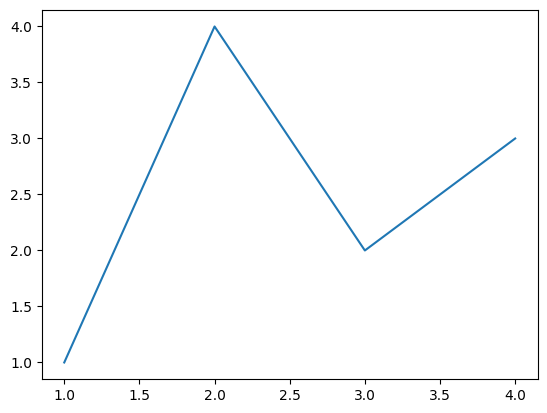

In [10]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], 
        [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure.

## Parts of a Figure

![](./attch/antomy.png)

- **Figure**: The whole figure
- **Axes**: Contains a **region** for plotting data, and usually includes two (or three in the case of 3D) Axis objects. <u>The Axes methods are the primary interface for configuring most parts of your plot (adding data, controlling axis scales and limits, adding labels etc.)</u> Each Axes also has:
    - a title
    - an x-label
    - a y-label.
- **Axis**:Set the scale and limits and generate ticks (the marks on the Axis) and ticklabels. The location of the ticks is determined by a `Locator` object and the ticklabel strings are formatted by a `Formatter`.
- Artist: Basically, everything visible on the Figure is an Artist 

### Figure

The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc.), and even nested subfigures.

`subplots()` and `subplot_mosaic` are convenience functions that <u>additionally create Axes objects inside the Figure</u>, but you can also manually add Axes later on.

<Figure size 640x480 with 0 Axes>

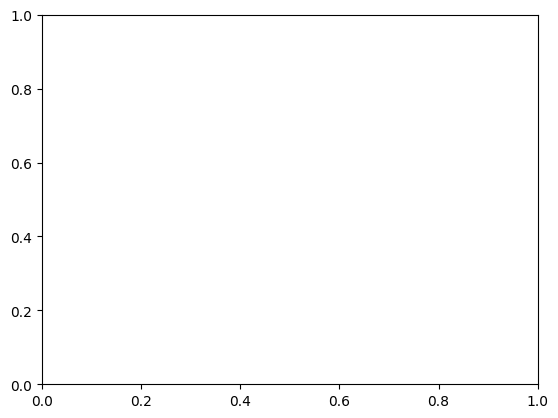

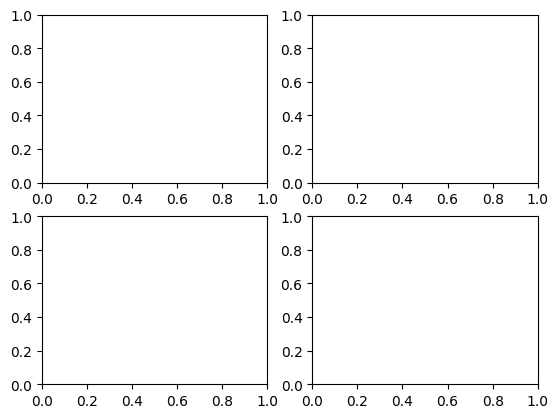

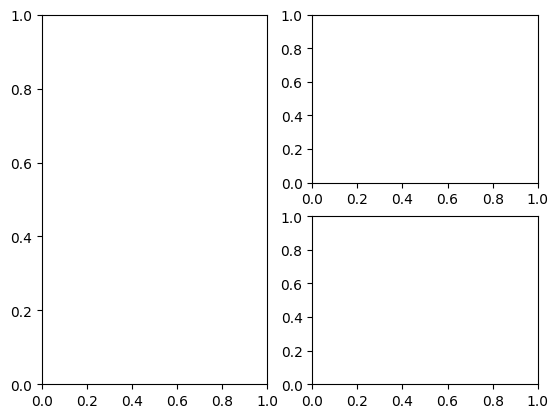

In [18]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  ## a figure with a 2x2 grid of Axes
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

Text(0.5, 1.0, 'right')

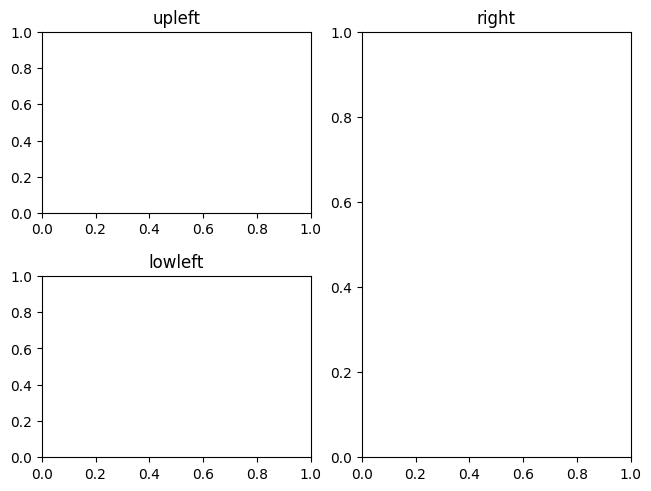

In [68]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')

## Types of inputs to plotting functions

- Plotting functions expect `numpy.array` or `numpy.ma.masked_array`.Convert data to `numpy.array` objects prior to plotting.
- Most methods will also parse a **string-indexable** object like a *dict*, a structured numpy array, or a pandas.DataFrame. 
- Matplotlib allows you to provide the data keyword argument and generate plots passing the strings corresponding to the x and y variables.

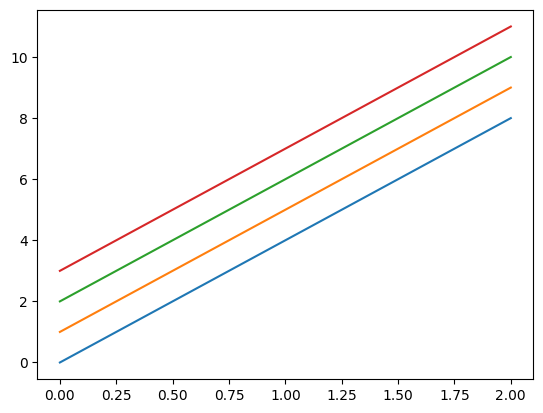

In [25]:
X = np.arange(12).reshape(3, 4)
plt.plot(X)

Text(0, 0.5, 'entry b')

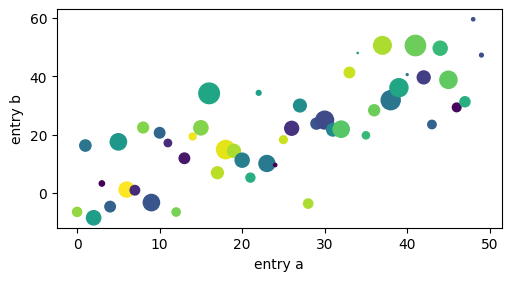

In [30]:
np.random.seed(19680802)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
"""
生成了一个散点图：
•	'a' 列的数据用于 x 轴
•	'b' 列的数据用于 y 轴
•	'c' 列的数据用于决定散点的颜色
•	'd' 列的数据用于决定散点的大小（半径）
"""
ax.scatter(x='a', y='b', c='c', s='d', data=data) 

ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

## Coding styles

There are essentially two ways to use Matplotlib:
1. Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
2. Rely on pyplot to implicitly create and manage the Figures and Axes, and use pyplot functions for plotting.

总的来说，了解显式的 “Axes” 接口很有用，因为它是最灵活的，并且是其他接口的基础。用户通常可以弄清楚如何下拉到 explicit 接口并对底层对象进行操作。虽然显式接口的设置可能更冗长一些，但复杂的绘图通常比尝试使用隐式 “pyplot” 接口更简单。

### OO-style

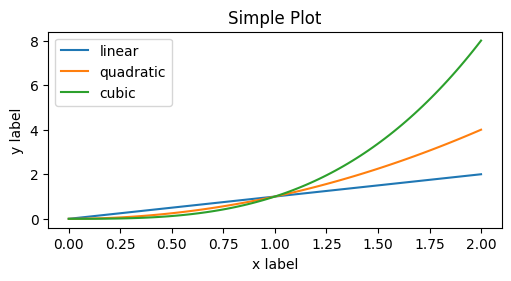

In [44]:
x = np.linspace(0, 2, 100)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.plot(x, x, label='linear')
ax.plot(x, x**2, label='quadratic')
ax.plot(x, x**3, label='cubic')
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Simple Plot")
ax.legend()

### pyplot-style

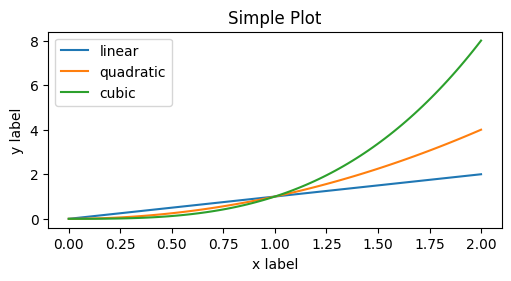

In [46]:
x = np.linspace(0, 2, 100)
plt.figure(figsize=(5, 2.7), layout='constrained')
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()

## Making a helper functions

同一函数在不同数据集中多次生成时

In [47]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

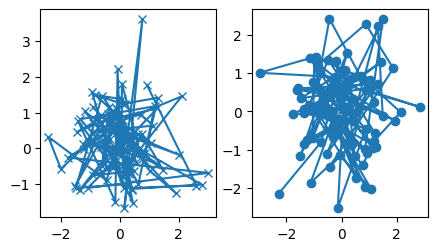

In [53]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'})

常用的 marker 选项：
- 	'.' : 点标记
- ',' : 像素标记
- 'o' : 圆标记
- 'v' : 倒三角形标记
- '^' : 正三角形标记
- 's' : 方形标记
- '*' : 星形标记

## Styling Artists

在plot method创建的时候或者用`setter`形式可以设置Style

### LineStyle

**常用 linestyle 选项**：
- '-' 或 'solid'：实线（默认值）
- '--' 或 'dashed'：虚线
- '-.' 或 'dashdot'：点划线（虚线与点交替）
- ':' 或 'dotted'：点线（由点构成的线）

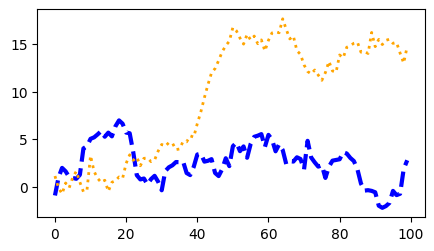

In [54]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':')

### Colors

![](./attch/color.png)

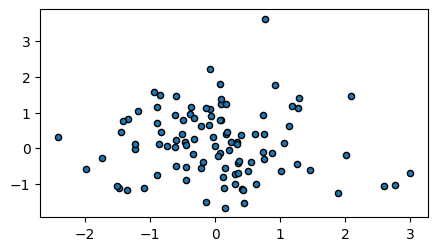

In [58]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=20, facecolor='C0', edgecolor='k')

## Labelling plots

### Axes labels and text
- `set_xlabel`, `set_ylabel`, and `set_title` are used to add text in the indicated locations
-  Text can also be directly added to plots using `text`

### Using mathematical expressions in text
Matplotlib accepts TeX equation expressions in any text expression. 

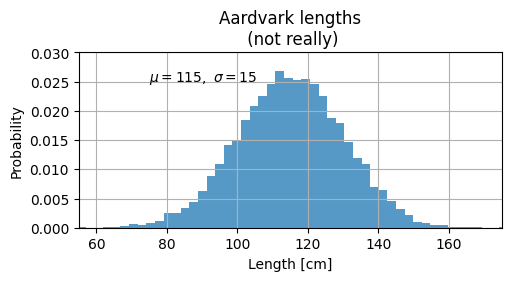

In [60]:
mu, sigma = 115, 15 # 定义正态分布的均值 (mu) 和标准差 (sigma)
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')

"""
ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75) 创建了一个直方图：
    •	x 是用于绘制直方图的数据。
    •	50 表示将数据分为 50 个区间（bin）。
    •	density=True 表示将直方图归一化，使其面积为 1，这样可以用作概率密度图。
    •	facecolor='C0' 设置直方图的颜色为 Matplotlib 默认的第一种颜色（蓝色）。
    •	alpha=0.75 设置颜色的透明度，值为 0.75 表示颜色稍微透明。
    •	返回值 n 是每个 bin 中的数据数量，bins 是区间的边界，patches 是绘制的直方图对象。
"""
n, bins, patches = ax.hist(x, 50, density=True, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True)

### Annotations

We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext:

(-2.0, 2.0)

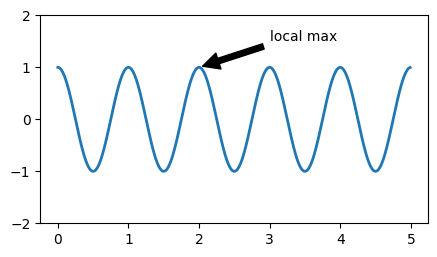

In [61]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)

## Legends

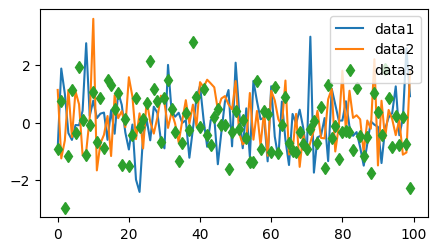

In [62]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend()

## Axis scales and ticks

### Scales

Illustrate the scale transformations applied to axes, e.g. log, symlog, logit.
- 线性（linear）缩放
- 对数（log）
- 对称对数（symlog）
- 对数几何（logit）

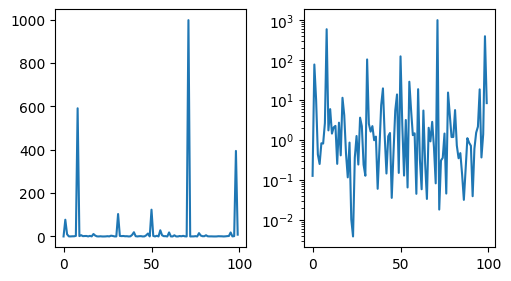

In [63]:
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data)

### Tick locators and formatters

Text(0.5, 1.0, 'Manual ticks')

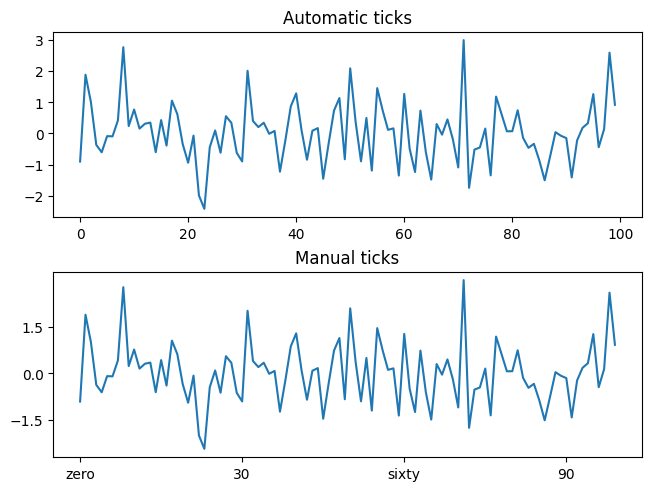

In [64]:
fig, axs = plt.subplots(2, 1, layout='constrained')
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])  # note that we don't need to specify labels
axs[1].set_title('Manual ticks')

### Plotting dates and strings

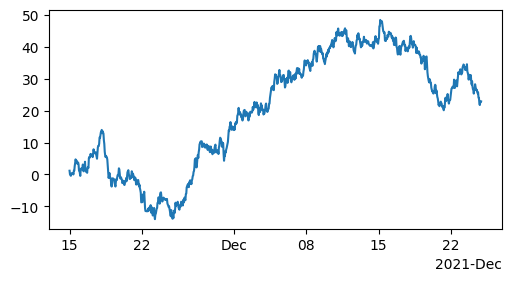

In [65]:
from matplotlib.dates import ConciseDateFormatter

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'),
                  np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
ax.xaxis.set_major_formatter(ConciseDateFormatter(ax.xaxis.get_major_locator()))

In [ ]:
fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)))

### Additional Axis objects

Axis can be created by :
- using `twinx` to add a new Axes with an invisible x-axis and a y-axis positioned at the **right**
- add a  `secondary_xaxis` or secondary_yaxis having a different scale than the main Axis to represent the data in different scales or units.

Text(0.5, 0, 'Angle [°]')

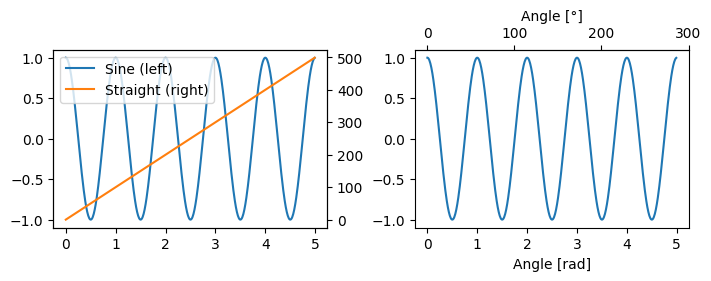

In [66]:
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(7, 2.7), layout='constrained')
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [rad]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [°]')

## Color Mapped Data

Text(0.5, 1.0, 'scatter()')

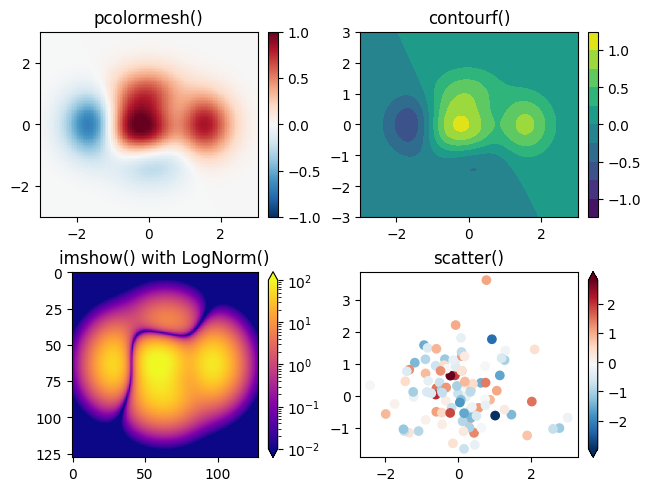

In [67]:
from matplotlib.colors import LogNorm

X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2, layout='constrained')
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()')

## 常见类型的图

1. **折线图（Line Plot）**
2. **散点图（Scatter Plot）**
3. **柱状图（Bar Plot）**
4. **直方图（Histogram）**
5. **箱线图（Box Plot）**
6. **饼图（Pie Chart）**
7. **热力图（Heatmap）**
8. **等高线图（Contour Plot）**
9. **面积图（Area Plot）**
10. **误差棒图（Error Bar Plot）**

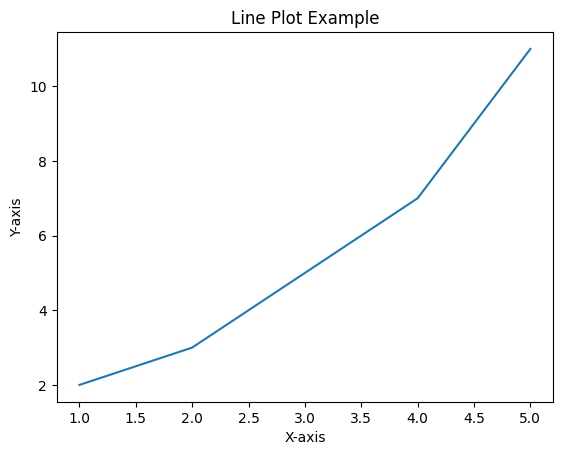

In [71]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.plot(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Line Plot Example')
plt.show()

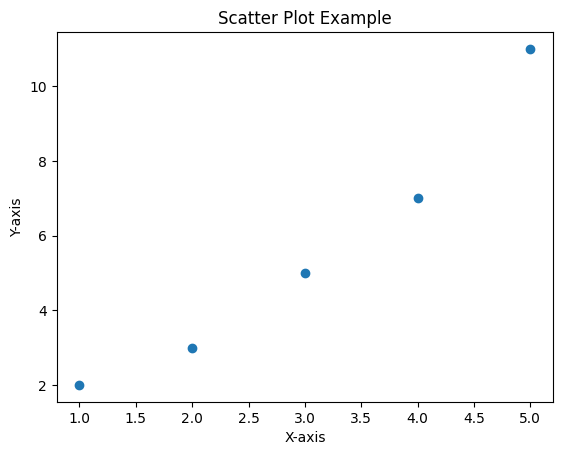

In [72]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5]
y = [2, 3, 5, 7, 11]

plt.scatter(x, y)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Scatter Plot Example')
plt.show()

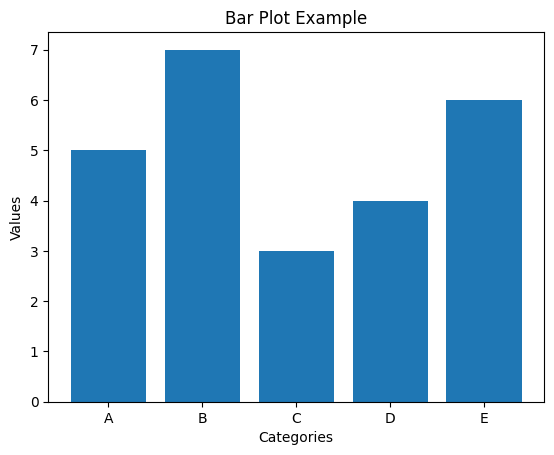

In [73]:
import matplotlib.pyplot as plt

categories = ['A', 'B', 'C', 'D', 'E']
values = [5, 7, 3, 4, 6]

plt.bar(categories, values)
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Bar Plot Example')
plt.show()

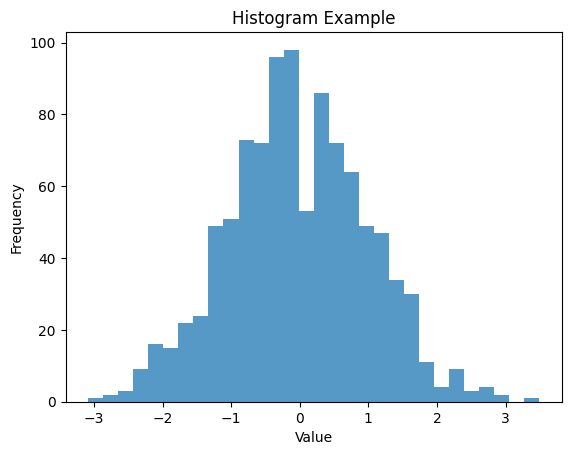

In [74]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(1000)

plt.hist(data, bins=30, alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram Example')
plt.show()

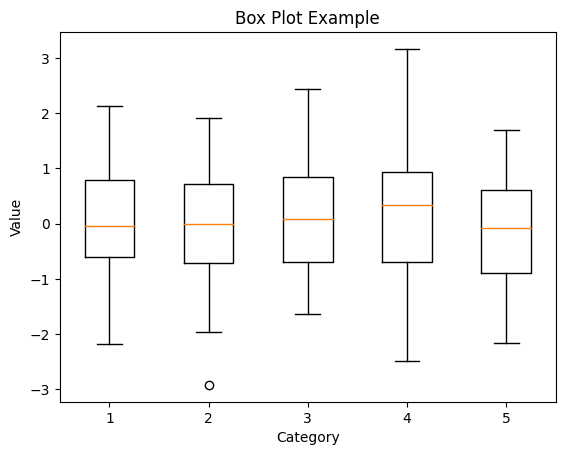

In [75]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.randn(100, 5)

plt.boxplot(data)
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Box Plot Example')
plt.show()

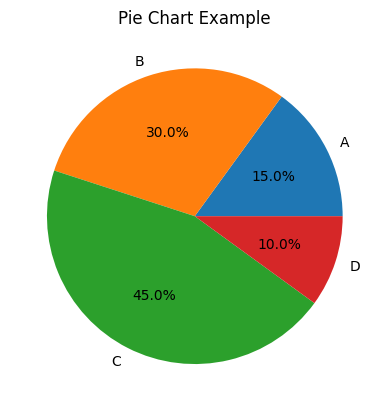

In [76]:
import matplotlib.pyplot as plt

sizes = [15, 30, 45, 10]
labels = ['A', 'B', 'C', 'D']

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart Example')
plt.show()

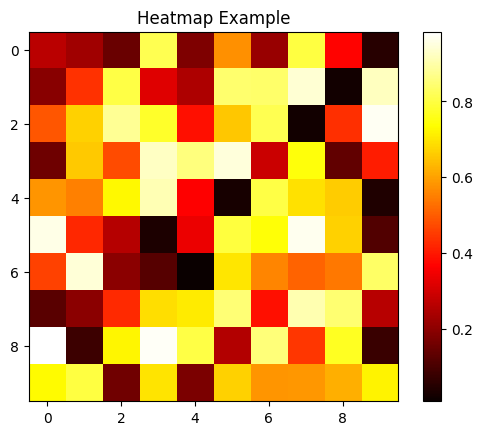

In [77]:
import matplotlib.pyplot as plt
import numpy as np

data = np.random.rand(10, 10)

plt.imshow(data, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Heatmap Example')
plt.show()

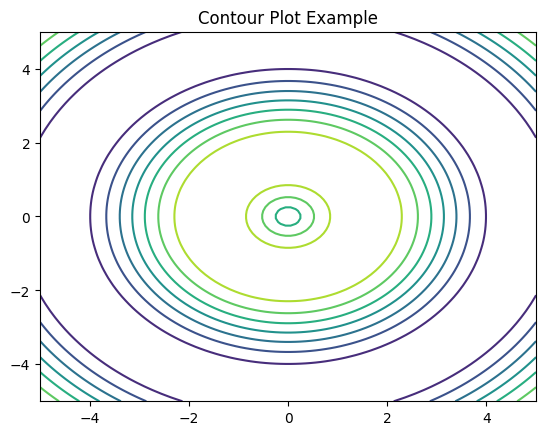

In [78]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

plt.contour(X, Y, Z)
plt.title('Contour Plot Example')
plt.show()

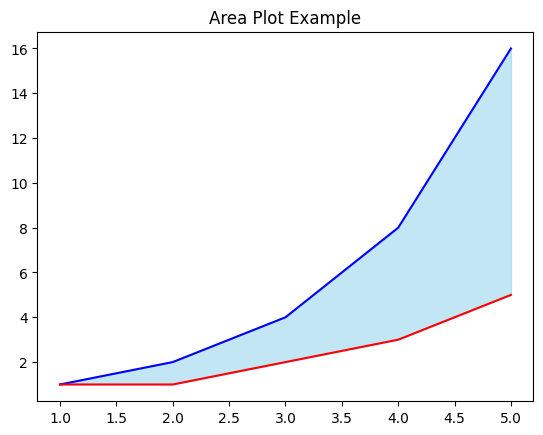

In [79]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 6)
y1 = np.array([1, 2, 4, 8, 16])
y2 = np.array([1, 1, 2, 3, 5])

plt.fill_between(x, y1, y2, color='skyblue', alpha=0.5)
plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.title('Area Plot Example')
plt.show()

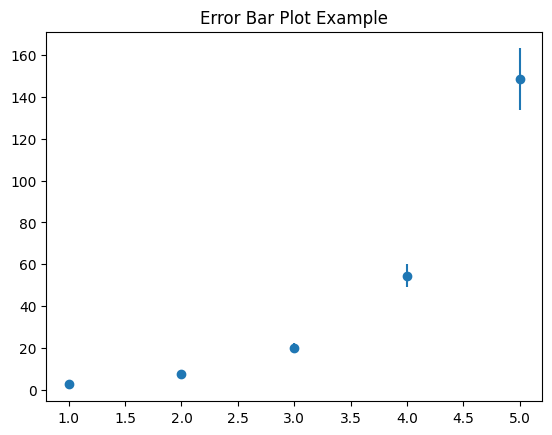

In [80]:
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(1, 6)
y = np.exp(x)
errors = y * 0.1

plt.errorbar(x, y, yerr=errors, fmt='o')
plt.title('Error Bar Plot Example')
plt.show()